<a href="https://colab.research.google.com/github/RizekyGunawan/Portofolio/blob/main/data-analysis/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Pengguna Aplikasi X pada Google Play Store**



Tahapan Analisis Data Sentimen


1.   Data Selection
     * Normalisasi
     * Labeling
2.   PreProcessing

     * Cleaning
     * Stopword
     * Tokenize
     * Stemming     
3.   Visualiasi
4.   Klasifikasi Sentimen
5.   Evaluation

#Select Data

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

Import file excel

In [ ]:
df = pd.read_excel("/content/hasil-scraping-data.xlsx")
df.head()

,review_id,username,rating,review_text,date
0,b5b788e6-0a33-4f14-bc59-f985afc2de34,DYMC Â· I S T A K A,3,kenapa kalau saya ingin membuka vidio cerita s...,2025-05-18 04:04:13
1,37509485-243a-4497-a20b-7ac6a158ab85,CANAMO Smart pipel,5,komunitas nya ramah dan kocakðŸ˜¹,2025-05-18 03:39:50
2,af3d3193-72b3-4ec7-9979-21ffc6d3519c,james James gare 123,5,wow,2025-05-18 03:22:50
3,ac21fa91-18a3-41a1-9c43-7b4d2150971f,xsrynt,5,nice,2025-05-18 03:19:36
4,98cd1f18-50b0-4700-baab-c79eb47e49b3,kak gem,2,baru nge buka postingan orang 3 detik pas di k...,2025-05-18 03:05:17


In [ ]:
df = df[['review_text', 'date', 'rating']]
df

,review_text,date,rating
0,kenapa kalau saya ingin membuka vidio cerita s...,2025-05-18 04:04:13,3
1,komunitas nya ramah dan kocakðŸ˜¹,2025-05-18 03:39:50,5
2,wow,2025-05-18 03:22:50,5
3,nice,2025-05-18 03:19:36,5
4,baru nge buka postingan orang 3 detik pas di k...,2025-05-18 03:05:17,2
...,...,...,...
1995,ini gimana ya X nya tiba tiba sering keluar dr...,2025-04-14 01:24:28,2
1996,hari senin 14 April aplikasinya gak bisa di bu...,2025-04-14 01:22:02,1
1997,i love this aplication,2025-04-14 01:12:52,5
1998,sangat membantu dan mudah di gunanakn..namu ke...,2025-04-14 00:59:11,5


Labeling berdasarkan kolom Rating

In [ ]:
df['label'] = df['rating'].apply(lambda x: 'negatif' if x <= 2 else 'positif')
print(df[['rating', 'label']])

      rating    label
0          3  positif
1          5  positif
2          5  positif
3          5  positif
4          2  negatif
...      ...      ...
1995       2  negatif
1996       1  negatif
1997       5  positif
1998       5  positif
1999       5  positif

[2000 rows x 2 columns]


In [ ]:
df.head(5)

,review_text,date,rating,label
0,kenapa kalau saya ingin membuka vidio cerita s...,2025-05-18 04:04:13,3,positif
1,komunitas nya ramah dan kocakðŸ˜¹,2025-05-18 03:39:50,5,positif
2,wow,2025-05-18 03:22:50,5,positif
3,nice,2025-05-18 03:19:36,5,positif
4,baru nge buka postingan orang 3 detik pas di k...,2025-05-18 03:05:17,2,negatif


Mengunduh file hasil Labeling

In [ ]:
df.to_excel('labeling_data_new.xlsx', index=False)

from google.colab import files
files.download('labeling_data_new.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Preprocessing

In [ ]:
#Cleaning
import re
import string

# Fungsi untuk membersihkan komentar Instagram
def clean_comment_instagram(data):
    if pd.isna(data): # Check if data is NaN
        return ''
    # Menghapus karakter khusus macam @mentions, #hastag, url, dan emote
    data = re.sub(r'@[A-Za-z0-9_]+', '', data)
    data = re.sub(r'#\w+', '', data)
    data = re.sub(r'RT[\s]+', '', data)
    data = re.sub(r'https?://\S+', '', data)
    data = re.sub(r'[^A-Za-z0-9]', ' ', data)

    # Menghapus tanda baca
    data = data.translate(str.maketrans('', '', string.punctuation))

    # Normalisasi teks
    # data = data.lower() # Mengubah menjadi lowercase
    data = re.sub(r'\s+', ' ', data).strip() # Menghapus spasi berlebih

    # Menghapus angka yang menempel pada kata
    data = re.sub(r'\d+', '', data)

    return data # Mengembalikan data tanpa koreksi typo

# Menambahkan kolom baru 'Cleaning' dengan data yang telah dibersihkan
df['cleaning'] = df['review_text'].apply(clean_comment_instagram)

# Menghapus duplikat dan data kosong
df = df.drop_duplicates(subset=['cleaning'])
df = df.dropna()

# Memilih kolom 'comment', 'label', dan 'Cleaning'
df = df[['review_text', 'cleaning', 'label']]

# Menampilkan 5 baris pertama untuk memastikan kolom baru telah ditambahkan
df.head()

,review_text,cleaning,label
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif
2,wow,wow,positif
3,nice,nice,positif
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif


Mengubah bentuk huruf kapital menjadi kecil

In [ ]:
# - Case Folding

# df['case_folding'] = df['cleaning'].str.lower()
df['cleaning'].str.lower()
df.head()

,review_text,cleaning,label
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif
2,wow,wow,positif
3,nice,nice,positif
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif


Mencacah kalimat menjadi kata per kata

In [ ]:
# Tokenizing
df['tokenized'] = df['cleaning'].apply(lambda x:x.split())
df.head()

,review_text,cleaning,label,tokenized
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif,"[kenapa, kalau, saya, ingin, membuka, vidio, c..."
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif,"[komunitas, nya, ramah, dan, kocak]"
2,wow,wow,positif,[wow]
3,nice,nice,positif,[nice]
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif,"[baru, nge, buka, postingan, orang, detik, pas..."


Stemming menggunakan Sastrawi

In [ ]:
# - Stemming
!pip install Sastrawi

# Mengimpor pustaka yang diperlukan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Membuat instance dari StemmerFactory dan Stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stemming(text_cleaning):
    # Menstem setiap kata dalam teks yang sudah dibersihkan
    stemmed_words = [stemmer.stem(word) for word in text_cleaning]
    # Menggabungkan kembali kata-kata yang sudah di-stem menjadi satu string
    return " ".join(stemmed_words)

# Asumsikan 'tokenized' adalah DataFrame yang sudah berisi tokenisasi komentar
df['hasil_stemming'] = df['tokenized'].apply(stemming)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
df.head(5)

,review_text,cleaning,label,tokenized,hasil_stemming
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif,"[kenapa, kalau, saya, ingin, membuka, vidio, c...",kenapa kalau saya ingin buka vidio cerita sela...
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif,"[komunitas, nya, ramah, dan, kocak]",komunitas nya ramah dan kocak
2,wow,wow,positif,[wow],wow
3,nice,nice,positif,[nice],nice
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif,"[baru, nge, buka, postingan, orang, detik, pas...",baru nge buka postingan orang detik pas di kem...


In [ ]:
df['tokenized_stemming'] = df['hasil_stemming'].apply(lambda x: x.split())
df.head()

,review_text,cleaning,label,tokenized,hasil_stemming,tokenized_stemming
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif,"[kenapa, kalau, saya, ingin, membuka, vidio, c...",kenapa kalau saya ingin buka vidio cerita sela...,"[kenapa, kalau, saya, ingin, buka, vidio, ceri..."
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif,"[komunitas, nya, ramah, dan, kocak]",komunitas nya ramah dan kocak,"[komunitas, nya, ramah, dan, kocak]"
2,wow,wow,positif,[wow],wow,[wow]
3,nice,nice,positif,[nice],nice,[nice]
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif,"[baru, nge, buka, postingan, orang, detik, pas...",baru nge buka postingan orang detik pas di kem...,"[baru, nge, buka, postingan, orang, detik, pas..."


Stopwords Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = ["indonesia", "indonesian"]

# Buat instance dari StopWordRemoverFactory
factory = StopWordRemoverFactory()

# Ambil daftar stopwords bawaan dari Sastrawi
stop_words = factory.get_stop_words()

# Tambahkan stopwords tambahan ke daftar stopwords
stop_words.extend(more_stop_words)

# Buat array dictionary untuk stopwords
new_array = ArrayDictionary(stop_words)

# Buat instance dari StopWordRemover dengan stopwords yang telah diperbarui
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords dari teks
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# Terapkan fungsi stopword ke kolom 'comment' pada DataFrame
df['stopword_removal'] = df['hasil_stemming'].apply(stopword)



In [ ]:
# Lihat beberapa baris hasil untuk memastikan
df.head(5)

,review_text,cleaning,label,tokenized,hasil_stemming,tokenized_stemming,stopword_removal
0,kenapa kalau saya ingin membuka vidio cerita s...,kenapa kalau saya ingin membuka vidio cerita s...,positif,"[kenapa, kalau, saya, ingin, membuka, vidio, c...",kenapa kalau saya ingin buka vidio cerita sela...,"[kenapa, kalau, saya, ingin, buka, vidio, ceri...",kalau ingin buka vidio cerita selalu salah tek...
1,komunitas nya ramah dan kocakðŸ˜¹,komunitas nya ramah dan kocak,positif,"[komunitas, nya, ramah, dan, kocak]",komunitas nya ramah dan kocak,"[komunitas, nya, ramah, dan, kocak]",komunitas nya ramah kocak
2,wow,wow,positif,[wow],wow,[wow],wow
3,nice,nice,positif,[nice],nice,[nice],nice
4,baru nge buka postingan orang 3 detik pas di k...,baru nge buka postingan orang detik pas di ke...,negatif,"[baru, nge, buka, postingan, orang, detik, pas...",baru nge buka postingan orang detik pas di kem...,"[baru, nge, buka, postingan, orang, detik, pas...",baru nge buka postingan orang detik pas kembal...


Mengunduh file kedalam Excel

In [ ]:
df.to_excel('hasil_preprocessing_data.xlsx', index=False)

from google.colab import files  # Import files here
files.download('hasil_preprocessing_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Pembobotan TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Sesuaikan dengan data 'comment' yang telah di-preprocessing dan transformasikan
tfidf = tfidf_vectorizer.fit_transform(df['review_text'])  # Ganti 'df' dengan nama DataFrame Anda yang berisi data yang telah di-preprocessing

# Dapatkan daftar fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Buat DataFrame untuk menampilkan kata dan bobotnya
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=feature_names)

# Tampilkan DataFrame
print(df_tfidf)

      aaplikasi  abad  abded  abdute  abis  abistu  account   ad  ada  \
0           0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
1           0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
2           0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
3           0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
4           0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
...         ...   ...    ...     ...   ...     ...      ...  ...  ...   
1509        0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
1510        0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
1511        0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
1512        0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   
1513        0.0   0.0    0.0     0.0   0.0     0.0      0.0  0.0  0.0   

      adaribetnya  ...  yay        yg  yng  you  your  youtube  ytim  zaman  \
0             0.0  ...  0.0  0.000000  0.0  

**Mempelajari kosakata unik**

In [ ]:
review_text = df['review_text']
cv = CountVectorizer()
term_fit = cv.fit(review_text)
#mencetak ukuran kosakata, yaitu jumlah total kata unik yang ditemukan dalam data comment
print(len(term_fit.vocabulary_))

2323


**Menampilkan kosakata dari kata-kata unik dan nilainya adalah indeks numerik yang sesuai yang diberikan kepada setiap kata**

In [ ]:
term_fit.vocabulary_

{'kalau': 926,
 'ingin': 825,
 'buka': 348,
 'vidio': 2246,
 'cerita': 395,
 'selalu': 1830,
 'salah': 1761,
 'teknis': 2038,
 'baik': 181,
 'bug': 344,
 'nya': 1474,
 'username': 2225,
 'rendy': 1712,
 'komunitas': 1027,
 'ramah': 1682,
 'kocak': 1014,
 'wow': 2297,
 'nice': 1440,
 'baru': 212,
 'nge': 1399,
 'postingan': 1641,
 'orang': 1511,
 'detik': 468,
 'pas': 1553,
 'kembali': 959,
 'langsung': 1081,
 'refresh': 1701,
 'oalah': 1487,
 'beranda': 248,
 'ngeselin': 1420,
 'kalo': 929,
 'nyari': 1481,
 'susah': 1979,
 'banget': 197,
 'makin': 1187,
 'kesini': 983,
 'jelek': 879,
 'bagus': 171,
 'aplikasi': 120,
 'buruk': 359,
 'sering': 1861,
 'keluar': 956,
 'sendiri': 1848,
 'miris': 1299,
 'akun': 56,
 'udah': 2181,
 'pake': 1536,
 'email': 554,
 'tahun': 1999,
 'lalu': 1072,
 'aja': 34,
 'verifikasi': 2237,
 'kek': 954,
 'apk': 115,
 'idiot': 796,
 'bobrok': 318,
 'dah': 440,
 'sekarang': 1823,
 'harap': 747,
 'aksesibel': 48,
 'guna': 724,
 'tunanetra': 2162,
 'bisa': 288,
 '

**Menghitung seberapa sering setiap kata muncul dalam setiap komentar.**

In [ ]:
#Kolom pertama  = jumlah dokumen
#Kolom kedua = letak katanya
#Kolom ketika = hasil dari tf
term_frequency_all = term_fit.transform(review_text)
print(term_frequency_all)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10989 stored elements and shape (1514, 2323)>
  Coords	Values
  (0, 181)	1
  (0, 344)	1
  (0, 348)	1
  (0, 395)	1
  (0, 825)	1
  (0, 926)	1
  (0, 1474)	1
  (0, 1712)	1
  (0, 1761)	1
  (0, 1830)	1
  (0, 2038)	1
  (0, 2225)	1
  (0, 2246)	1
  (1, 1014)	1
  (1, 1027)	1
  (1, 1474)	1
  (1, 1682)	1
  (2, 2297)	1
  (3, 1440)	1
  (4, 197)	1
  (4, 212)	1
  (4, 248)	1
  (4, 348)	1
  (4, 468)	1
  (4, 929)	1
  :	:
  (1509, 2314)	1
  (1510, 120)	1
  (1510, 130)	1
  (1510, 348)	1
  (1510, 474)	1
  (1510, 647)	1
  (1510, 750)	1
  (1510, 877)	1
  (1510, 1322)	1
  (1510, 1852)	1
  (1511, 119)	1
  (1511, 1154)	1
  (1511, 2090)	1
  (1512, 203)	1
  (1512, 474)	1
  (1512, 725)	1
  (1512, 1083)	1
  (1512, 1337)	1
  (1512, 1367)	1
  (1512, 1474)	1
  (1512, 1609)	1
  (1512, 1774)	1
  (1512, 2158)	1
  (1513, 288)	1
  (1513, 1252)	1


**Menghitung seberapa sering setiap kata muncul dalam komentar kedua**

In [ ]:
comment_tf = review_text[1]
print(comment_tf)

komunitas nya ramah kocak


In [ ]:
term_frequency = term_fit.transform([comment_tf])
print(term_frequency)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 2323)>
  Coords	Values
  (0, 1014)	1
  (0, 1027)	1
  (0, 1474)	1
  (0, 1682)	1


In [ ]:
#menghitung seberapa sering setiap kata muncul dalam setiap komentar dan menyimpan hasilnya dalam bentuk tabel.
dokumen = term_fit.transform(review_text)

#menghitung bobot setiap kata berdasarkan seberapa sering kata tersebut muncul dalam semua komentar. Kata yang jarang muncul akan memiliki bobot yang lebih tinggi.
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

#menghitung bobot akhir setiap kata dalam komentar tertentu dengan mempertimbangkan bobot yang dihitung sebelumnya
tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.63002354 7.63002354 7.63002354 ... 7.63002354 7.63002354 7.22455843]
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (1, 2323)>
  Coords	Values
  (0, 1014)	0.49525560034129223
  (0, 1027)	0.561756451611595
  (0, 1474)	0.28841701932304825
  (0, 1682)	0.5966298704960592


#**Algoritma Naive Bayes**

In [ ]:
#Spliting data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['review_text'], df['label'], test_size=0.1, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1362,)
(152,)
(1362,)
(152,)


In [ ]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Added the missing import statement

# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[80  4]
 [25 43]]
              precision    recall  f1-score   support

     negatif       0.76      0.95      0.85        84
     positif       0.91      0.63      0.75        68

    accuracy                           0.81       152
   macro avg       0.84      0.79      0.80       152
weighted avg       0.83      0.81      0.80       152



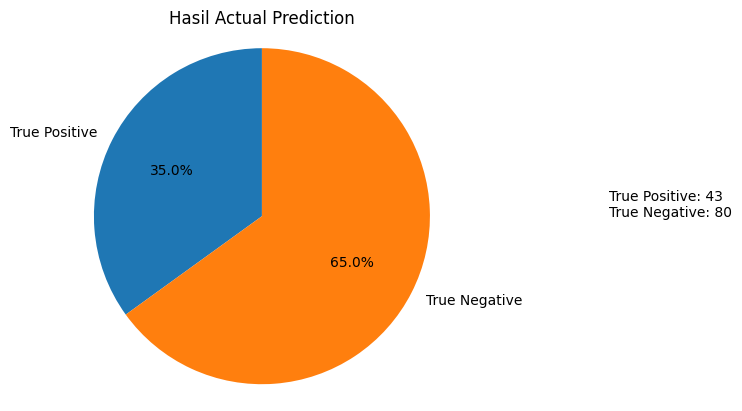

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


In [ ]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['review_text'], df['label'], test_size=0.2, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1211,)
(303,)
(1211,)
(303,)


In [ ]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [ ]:
# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[153  11]
 [ 46  93]]
              precision    recall  f1-score   support

     negatif       0.77      0.93      0.84       164
     positif       0.89      0.67      0.77       139

    accuracy                           0.81       303
   macro avg       0.83      0.80      0.80       303
weighted avg       0.83      0.81      0.81       303



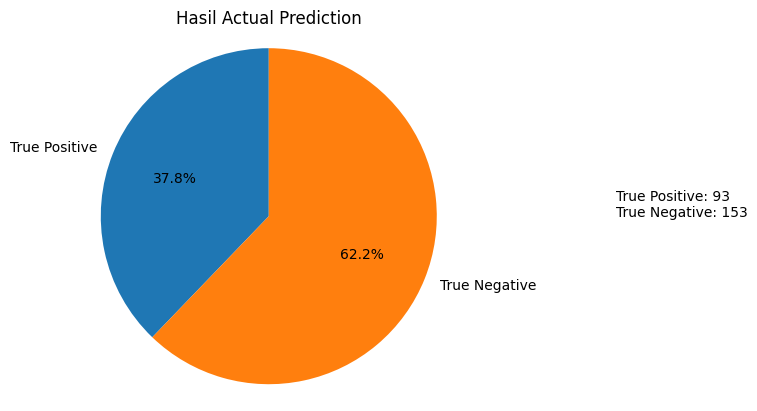

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


In [ ]:
# Split data training dan testing
x_train, x_test, y_train, y_test = train_test_split(df['review_text'], df['label'], test_size=0.3, random_state=42)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1059,)
(455,)
(1059,)
(455,)


In [ ]:
# Fit dan transform data training
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# Hanya transform data testing
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Inisialisasi dan latih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

# Prediksi data testing
y_pred = nb.predict(x_test_tfidf)

In [ ]:
# Evaluasi performa model
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print('============================================================================')
print(classification_report(y_test, y_pred, zero_division=0)) # Changed 'predicted' to 'y_pred'

Confusion Matrix:
[[222  21]
 [ 83 129]]
              precision    recall  f1-score   support

     negatif       0.73      0.91      0.81       243
     positif       0.86      0.61      0.71       212

    accuracy                           0.77       455
   macro avg       0.79      0.76      0.76       455
weighted avg       0.79      0.77      0.76       455



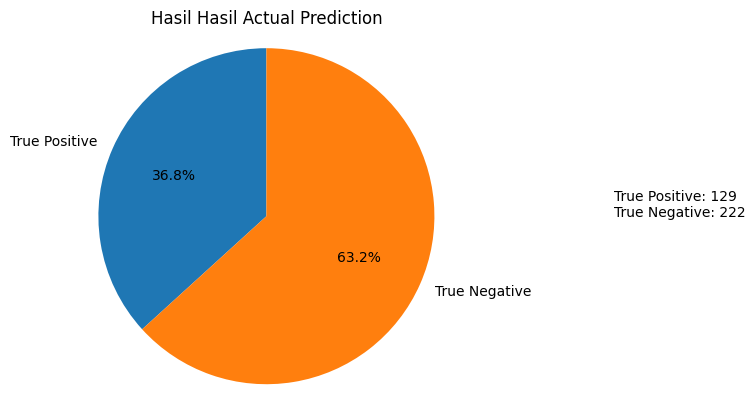

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ... (Your existing code for data preprocessing, model training, and prediction) ...

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ekstrak nilai true positive, true negative, false positive, dan false negative
tn, fp, fn, tp = cm.ravel()

# Data untuk pie chart
labels = ['True Positive', 'True Negative']
sizes = [tp, tn]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Hasil Hasil Actual Prediction')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"True Positive: {tp}\nTrue Negative: {tn}", transform=ax.transAxes)

# Tampilkan pie chart
plt.show()


#**Visualisasi**


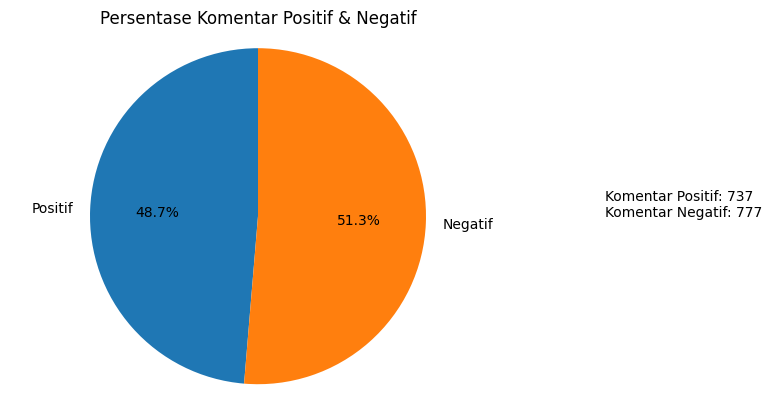

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah komentar positif dan negatif dari kolom 'label'
# Menggunakan label 'positif' dan 'negatif' yang sebenarnya ada di kolom df['label']
positive_comments = (df['label'] == 'positif').sum()
negative_comments = (df['label'] == 'negatif').sum()

# Data untuk pie chart
labels = ['Positif', 'Negatif'] # Mengubah label untuk tampilan di chart
sizes = [positive_comments, negative_comments]

# Buat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Tambahkan judul
plt.title('Persentase Komentar Positif & Negatif')

# Menampilkan jumlah data di samping pie chart
plt.text(1.2, 0.5, f"Komentar Positif: {positive_comments}\nKomentar Negatif: {negative_comments}", transform=ax.transAxes) # Mengubah teks keterangan

# Tampilkan pie chart
plt.show()

**Visualisasi Kata yang sering muncul**

In [ ]:
train_s0 = df[df['label'] == 'negatif']

In [ ]:
train_s0['review_text'] = train_s0['review_text'].fillna('tidak ada komentar')

<ipython-input-59-1acb8636092f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['review_text'] = train_s0['review_text'].fillna('tidak ada komentar')


In [ ]:
from wordcloud import WordCloud

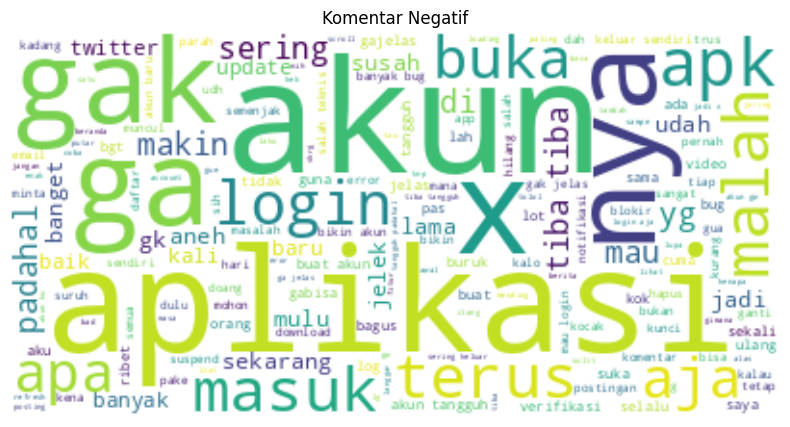

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0['review_text'])
wordcloud = WordCloud(background_color='white').generate(all_text_s0)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Komentar Negatif')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = df[df['label'] == 'positif']
train_s1['review_text'] = train_s1['review_text'].fillna('tidak ada komentar')

<ipython-input-62-d77deb57181b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1['review_text'] = train_s1['review_text'].fillna('tidak ada komentar')


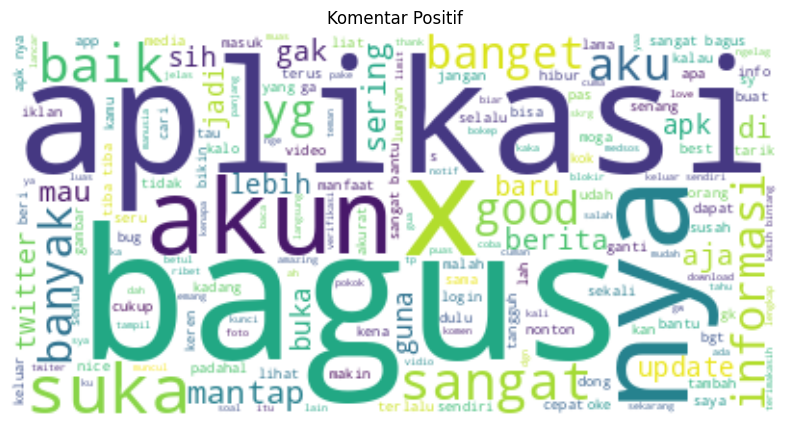

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1['review_text'])
wordcloud = WordCloud(background_color='white').generate(all_text_s1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Komentar Positif')
plt.margins(x=0, y=0)
plt.show()

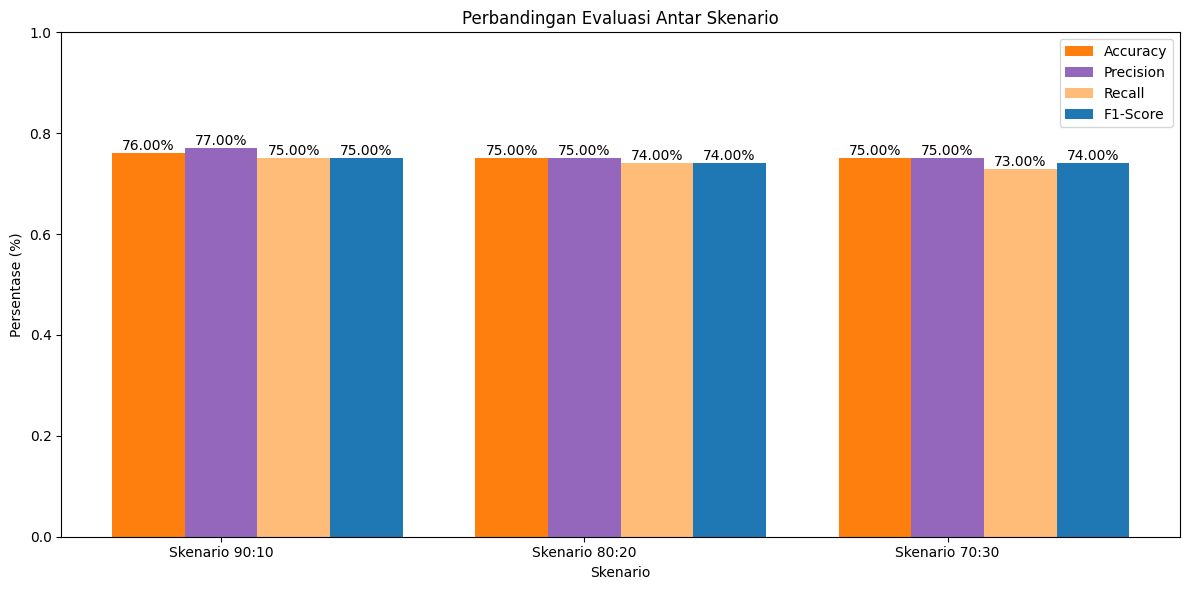

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Data
scenarios = ['Skenario 90:10', 'Skenario 80:20', 'Skenario 70:30']
accuracy = [0.76, 0.75, 0.75]
precision = [0.77, 0.75, 0.75]
recall = [0.75, 0.74, 0.73]
f1_score = [0.75, 0.74, 0.74]

# Mengatur lebar bar dan posisi
bar_width = 0.2
r1 = np.arange(len(scenarios))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Membuat plot
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='#ff7f0e', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='#9467bd', width=bar_width, label='Precision')
plt.bar(r3, recall, color='#ffbb78', width=bar_width, label='Recall')
plt.bar(r4, f1_score, color='#1f77b4', width=bar_width, label='F1-Score')

# Menambahkan label dan judul
plt.xlabel('Skenario')
plt.ylabel('Persentase (%)')
plt.title('Perbandingan Evaluasi Antar Skenario')
plt.xticks([r + bar_width for r in range(len(scenarios))], scenarios)

# Menambahkan nilai di atas setiap bar
for i, v in enumerate(accuracy):
    plt.text(r1[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(precision):
    plt.text(r2[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(recall):
    plt.text(r3[i], v, f'{v:.2%}', ha='center', va='bottom')
for i, v in enumerate(f1_score):
    plt.text(r4[i], v, f'{v:.2%}', ha='center', va='bottom')

# Menambahkan legend
plt.legend()

# Mengatur batas sumbu y
plt.ylim(0, 1)

# Menampilkan grafik
plt.tight_layout()
plt.show()